In [1]:
import pandas as  pd
import numpy as np  
from collections import Counter
import matplotlib.pyplot as plt
import re


In [56]:
def preprocess_text(text):
  """
  This function performs basic text cleaning on the input text.
  You can customize this function to include steps like removing punctuation,
  lowercase conversion, or stemming/lemmatization.
  """
  text = text.lower()  # Convert to lowercase
  text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
  return text

# Función para asignar categoría mejorada
def assign_category(keyword):
    keyword_processed = preprocess_text(keyword.lower())
    for word in keywords_urinarios:
        if word in keyword_processed:
            return 'Problemas Urinarios'
    for word in keywords_prostata:
        if word in keyword_processed:
            return 'Salud de la Prostata'
    for word in keywords_erectil:
        if word in keyword_processed:
            return 'Vida Sexual'
    return 'Otros'

def assign_genre(keyword):
  """
  Function that assigns gender (Hombre, Mujer, or Desconocido) to a keyword.

  Arguments:
      keyword (str): The keyword to analyze.

  Returns:
      str: "Hombre", "Mujer", or "Desconocido" based on the presence of gender indicative words.
  """
  keyword_processed = keyword.lower()


  if "mujeres" in keyword_processed or "mujer" in keyword_processed:
    return "Mujer"
  elif "hombres" in keyword_processed or "hombre" in keyword_processed:
    return "Hombre"
  else:
    return "Desconocido"


  
def clasificar_intencion(consulta):
  """
  Clasifica la intención de búsqueda en una consulta.

  Args:
    consulta: La consulta de búsqueda en forma de cadena de texto.

  Returns:
    La intención de búsqueda clasificada como "Diagnostico", "Sintomas", "Dudas", "Busqueda de tratamiento" u "Otros".
  """
  consulta_minusculas = consulta.lower()
  palabras_clave = {
      "sintomas": ["sangre","incontinencia","medicina","sensacion","orino","hago","siento","sintomas", "dolor", "molestia", "arde", "ardor", "escape", "problemas", "falta","perdida", "perdidas", "disfuncion erectil","erecciones", "dificultad", "siento", "quema", "ganas",  "sintoma", "frecuente", "duele", "perder", "debil", "hematura", "escapes", "para el pito","hematuria", "problema"],
      "causas": ["alcohol","causa", "masturbacion", "nervios", "estres", "generios", "causas", "ansiedad","drogas", "coca", "cocaina","aguantar", "aguantarse", "tengo", "poco","mucha", "muchas"],
      "tratamiento": ["curar","informacion", "tratamiento", "remedio", "cura", "curable", "medicamentos", "precio", "bajar", "ondas", "remedios", "medico", "medicamento", "clinicas", "medical", "nuevo", "mejor", "mejora", "mejorar", "terapia", "urologo", "recomendaciones", "soluciones","tratamientos","especialistas", "cirugia", "cirugia"],
      "miedo": ["diagnostico", "grave", "pastillas", "efectos","hierba", "hierbas", "enfermedad", "medicacion","natural", "ayuda" ],
      "dudas": ["ejercicios", "ejercicio", "efectividad", "significa","significado", "secundarios", "youtube","tipo","tipos", "debe", "solucion", "hay", "hiperplasia benigna","hiperplasia", "displacia", "grados", "grado", "hipertrofia", "respiracion kegel", "kegel", "urologia", "porque", "psicologo","valor", "protectores", "prostata","laser"]
  }
  for categoria, palabras in palabras_clave.items():
    for palabra in palabras:
      if re.search(r"\b" + palabra + r"\b", consulta_minusculas):
        return categoria

  return "Otros"

In [4]:
data = pd.read_csv("C:\\Repositorios\\Prueba Rubica\\Data_sets\\depurate_unificado.csv")


Exploracion inicial de los datos

In [5]:
print(f"Shape: \n", data.shape, "\n")
print("Colunas: \n", data.columns)
print("Muestra: \n", data.head(),"\n" )
print("Valores Null: \n", data.isnull().sum())


Shape: 
 (188122, 4) 

Colunas: 
 Index(['Keyword', 'country', 'region', 'Search'], dtype='object')
Muestra: 
                                          Keyword country     region  Search
0     diagnostico hiperplasia prostatica benigna     ARG  Argentina      10
1           clasificacion hiperplasia prostatica     ARG  Argentina      10
2                             diagnostico de hbp     ARG  Argentina      10
3          diagnostico de hiperplasia prostatica     ARG  Argentina      10
4  diagnostico de hiperplasia prostatica benigna     ARG  Argentina      10 

Valores Null: 
 Keyword    0
country    0
region     0
Search     0
dtype: int64


##  Exploracion de Keyword

Se decidio hacer un conteo de palabras mas repetidas en Keyword para determinar escoger con mayor precicion las categorias

In [6]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('spanish'))

data['Keyword_processed'] = data['Keyword'].apply(lambda x: lemmatizer.lemmatize(x))

data['Keyword_processed'] = data['Keyword'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))




[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moonw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moonw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
keywords = data["Keyword"].str.lower().str.split().explode().tolist()
counter = Counter(keywords)

print("Conteo de palabras clave: \n")
filtered_counts = {word: counter[word] for word in counter if len(word) > 4 and word not in ["porque", "ganas"]}
filtered_counts = pd.DataFrame(filtered_counts.items(), columns=["Keyword", "Count"])
filtered_counts.sort_values(by=["Count"], ascending=False, inplace=True)
filtered_counts.head(20)


Conteo de palabras clave: 



,Keyword,Count
26,orinar,32154
12,prostata,30357
28,sangre,16718
29,urinaria,14402
33,orina,13438
886,erectil,13009
744,disfuncion,12932
8,tratamiento,12725
35,infeccion,11661
27,dolor,11207


Se eliminan las filas que contienen datos iregulares en la columna Keyword

In [8]:
data = data[~data['Keyword'].str.match(r'^\d+$', na=False)]

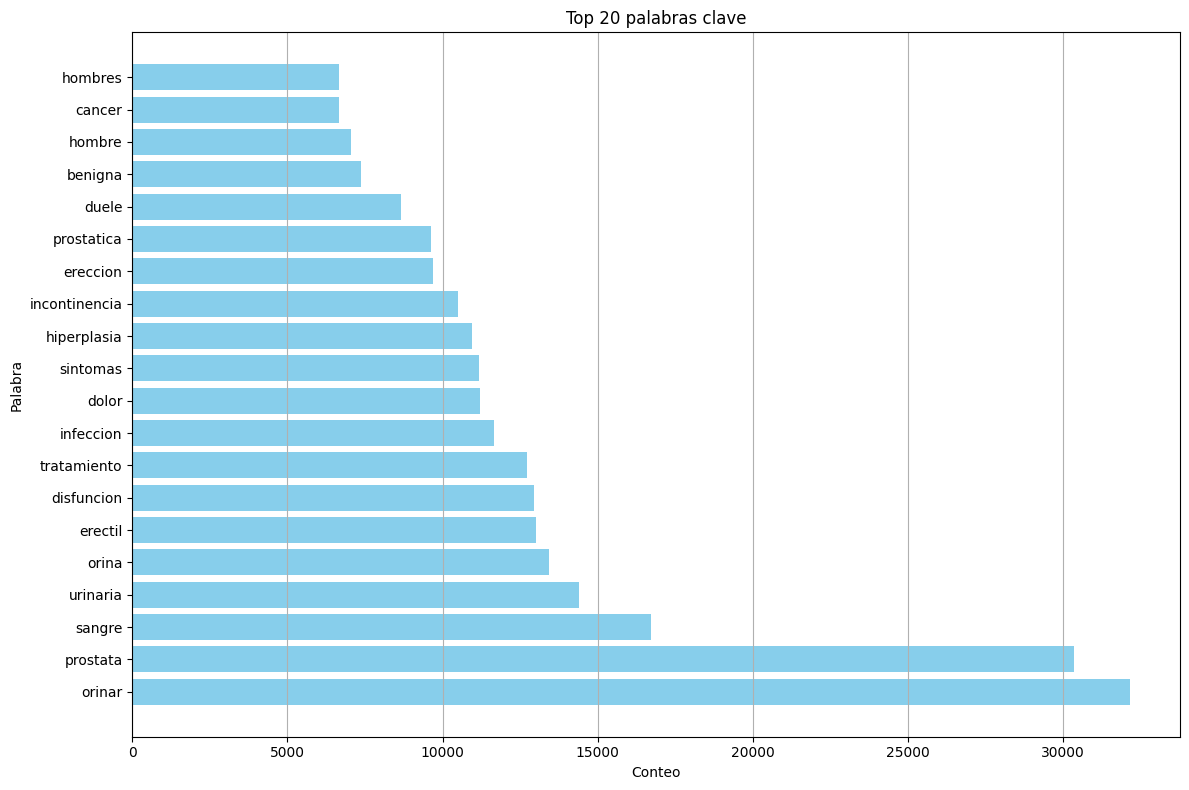

In [9]:
top_20_words = filtered_counts.head(20)["Keyword"].tolist() 
top_20_counts = filtered_counts.head(20)["Count"].tolist()  

plt.figure(figsize=(12, 8))
plt.barh(top_20_words, top_20_counts, color='skyblue', align='center')
plt.title("Top 20 palabras clave")
plt.xlabel("Conteo")
plt.ylabel("Palabra")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

Observando los términos más frecuentes en las busquedas como "orinar", "próstata", "tratamiento", "síntomas", etc., se logro identificar que  principales áreas de interés en tu dataset. Por ejemplo, parece que hay un enfoque significativo en temas relacionados con problemas urinarios, próstata, disfunción eréctil, entre otros.


### **Definicion de categorias**

Basado en los terminos mas frecuentes se determino definir  las categorias de la siguiente manera

* **Problemas Urinarios:** ['orinar', 'urinaria', 'orina', 'infección', 'incontinencia', 'sangre', 'hematuria', 'cistitis', 'vejiga', 'uretra', 'urinarias', 'sangrado'].
* **Salud de la Próstata:** ['próstata', 'prostática', 'hiperplasia', 'benigna', 'prostatitis', 'hipertrófica','agrandada', 'antígeno']
* **Disfuncion erectil y vida sexual:** ['erectil', 'erección', 'disfunción', 'impotencia', 'relaciones', 'sexuales']
* **Tratamiento y Síntomas:** ['tratamiento', 'dolor', 'síntomas', 'ardor', 'duele', 'medicamento', 'medicamentos', 'natural', 'naturales']

## Estructura y categorizacion final de los datos


Se utilizan las funciones creadas prebiamente para  la clasificacion de la **Intencion de la busqueda**  la clasificacion de las **Principales categorias** y **Genero**.


In [10]:
palabras_indicativas_hombre = data["Keyword_processed"].str.contains("hombres|hombre", case=False)
palabras_indicativas_mujer = data["Keyword_processed"].str.contains("mujeres|mujer", case=False)

data['genero'] = data['Keyword_processed'].apply(assign_genre)

In [60]:

keywords_urinarios = ['nicturia','orinar', 'urinaria', 'orina', 'infeccion', 'incontinencia', 'sangre', 'hematuria', 'cistitis', 'vejiga', 'uretra', 'urinarias', 'sangrado']
keywords_prostata = ['hpb','hbp','prostata', 'prostatica', 'hiperplasia', 'benigna', 'prostatitis', 'hipertrofica', 'agrandada', 'antigeno']
keywords_erectil = ['erecciones', 'se me para','kegel','erectil', 'ereccion', 'disfuncion', 'impotencia', 'relaciones', 'sexuales', 'sexual', 'sexualidad', 'sexo', 'reproductiva']
keywords_tratamiento = ['tratamiento', 'dolor', 'sintomas', 'ardor', 'duele', 'medicamento', 'medicamentos', 'natural', 'naturales']

data['category'] = data['Keyword_processed'].apply(assign_category)
data['motivo'] = data['Keyword'].apply(clasificar_intencion)


In [58]:
conteo = data.groupby(by='category')['category'].value_counts()
conteoMotivo = data.groupby(by='motivo')['motivo'].value_counts()
pd.DataFrame(conteo)
pd.DataFrame(conteoMotivo)

,count
motivo,
Otros,26787
causas,5038
dudas,32781
miedo,2528
sintomas,98630
tratamiento,22316


In [50]:
data.region.unique()

array(['Argentina', 'Chile', 'Colombia', 'Costa Rica', 'Ecuador',
       'Guatemala', 'México', 'Panamá', 'Peru'], dtype=object)

In [63]:
data

,Keyword,country,region,Search,Keyword_processed,genero,category,motivo
0,diagnostico hiperplasia prostatica benigna,ARG,Argentina,10,diagnostico hiperplasia prostatica benigna,Desconocido,Salud de la Prostata,miedo
1,clasificacion hiperplasia prostatica,ARG,Argentina,10,clasificacion hiperplasia prostatica,Desconocido,Salud de la Prostata,dudas
2,diagnostico de hbp,ARG,Argentina,10,diagnostico hbp,Desconocido,Salud de la Prostata,miedo
3,diagnostico de hiperplasia prostatica,ARG,Argentina,10,diagnostico hiperplasia prostatica,Desconocido,Salud de la Prostata,miedo
4,diagnostico de hiperplasia prostatica benigna,ARG,Argentina,10,diagnostico hiperplasia prostatica benigna,Desconocido,Salud de la Prostata,miedo
...,...,...,...,...,...,...,...,...
188117,tratamiento topico disfuncion erectil,PE,Peru,10,tratamiento topico disfuncion erectil,Desconocido,Vida Sexual,sintomas
188118,tratamientos de disfuncion erectil,PE,Peru,70,tratamientos disfuncion erectil,Desconocido,Vida Sexual,sintomas
188119,tratamientos disfuncion erectil,PE,Peru,720,tratamientos disfuncion erectil,Desconocido,Vida Sexual,sintomas
188120,tratamientos para problemas de ereccion,PE,Peru,10,tratamientos problemas ereccion,Desconocido,Vida Sexual,sintomas


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188080 entries, 0 to 188121
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Keyword            188080 non-null  object
 1   country            188080 non-null  object
 2   region             188080 non-null  object
 3   Search             188080 non-null  int64 
 4   Keyword_processed  188080 non-null  object
 5   genero             188080 non-null  object
 6   category           188080 non-null  object
 7   motivo             188080 non-null  object
dtypes: int64(1), object(7)
memory usage: 12.9+ MB


In [64]:
data.to_csv('C:\\Repositorios\\Prueba Rubica\\Data_sets\\data.csv')